# Analyzing Battles in the Russian Invasion of Ukraine

In [18]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

url = 'https://en.wikipedia.org/wiki/List_of_military_engagements_during_the_Russian_invasion_of_Ukraine'
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')
battles = soup.find('table', class_='wikitable')
df = pd.read_html(str(battles))[0]

#df.to_excel("output.xlsx") 

## Cleaning

In [19]:
# Remove Wiki citations
def remove_citations(text):
    citation = r'\[\w+\]'
    return re.sub(citation, '', text)
df['Result of the battle'] = df['Result of the battle'].apply(remove_citations)

# Remove trailing whitespaces
df['Theatre'] = df['Theatre'].str.strip()
df['Result of the battle'] = df['Result of the battle'].str.strip()

# Convert date columns to datetime
df['Start date'] = pd.to_datetime(df['Start date'], format='%d %B %Y')
df['End date'] = pd.to_datetime(df['End date'], format='%d %B %Y')

# Add a column for duration of each battle
df['Duration'] = (df['End date'] - df['Start date']).dt.days

df

,Name,Oblast,Start date,End date,Theatre,Result of the battle,Duration
0,Battle of Avdiivka,Donetsk,2022-02-21,NaT,Eastern,Ongoing,NaN
1,Battle of Hlukhiv,Sumy,2022-02-24,2022-03-17,Northern,Russian victory and subsequent withdrawal,21.0
2,Battle of Romny,Sumy,2022-02-24,2022-04-04,Northern,Ukrainian victory,39.0
3,Snake Island campaign,Odesa,2022-02-24,2022-02-25,Southern,Russian victory and subsequent withdrawal,1.0
4,Battle of Antonov Airport,Kyiv,2022-02-24,2022-02-25,Northern,Russian victory and subsequent withdrawal,1.0
5,Capture of Chernobyl,Kyiv,2022-02-24,2022-02-24,Northern,Russian victory and subsequent withdrawal,0.0
6,Battle of Kharkiv,Kharkiv,2022-02-24,2022-05-14,Eastern,Ukrainian victory,79.0
7,Battle of Kherson,Kherson,2022-02-24,2022-03-02,Southern,"Russian victory, occupation (March–November 2022)",6.0
8,Battle of Konotop,Sumy,2022-02-24,2022-02-25,Northern,"Russian victory, occupation (February–April 2022)",1.0
9,Battle of Okhtyrka,Sumy,2022-02-24,2022-03-26,Northern,Ukrainian victory,30.0


## Analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Name                  58 non-null     object        
 1   Oblast                58 non-null     object        
 2   Start date            58 non-null     datetime64[ns]
 3   End date              50 non-null     datetime64[ns]
 4   Theatre               58 non-null     object        
 5   Result of the battle  58 non-null     object        
 6   Duration              50 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 3.3+ KB


### Battles Per Oblast

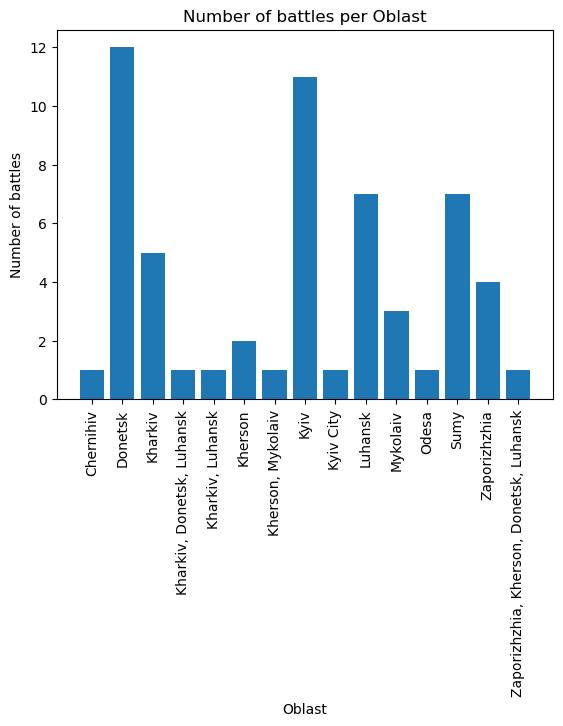

In [21]:
plt.bar(battles_per_oblast.index, battles_per_oblast.values)
plt.xticks(rotation=90)
plt.xlabel('Oblast')
plt.ylabel('Number of battles')
plt.title('Number of battles per Oblast')
plt.show()

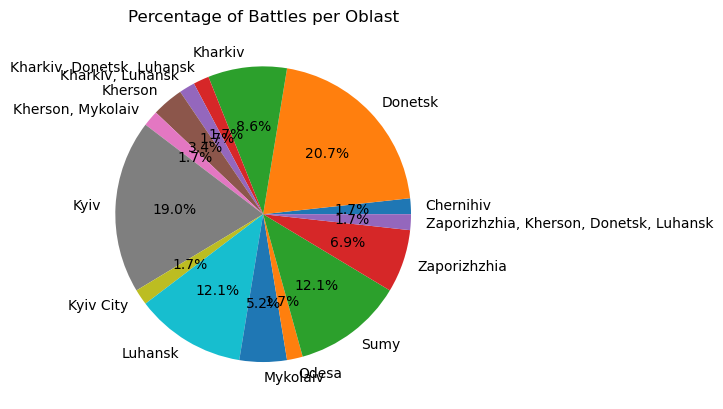

In [32]:
battles_per_oblast = df.groupby('Oblast').size()
all_battles = len(df)
percentage_battles_per_oblast = ((battles_per_oblast / all_battles) * 100)
percentage_battles_per_oblast

fig, ax = plt.subplots()
labels = percentage_battles_per_oblast.index
values = percentage_battles_per_oblast
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Battles per Oblast')

plt.show()

### Duration

#### Completed Battles

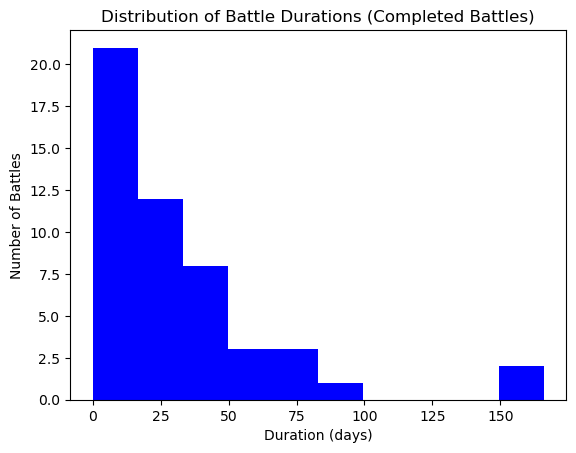

In [23]:
plt.hist(df['Duration'], bins=10, color='blue')
plt.title('Distribution of Battle Durations (Completed Battles)')
plt.xlabel('Duration (days)')
plt.ylabel('Number of Battles')

plt.show()

#### All Battles 

In [24]:
# Now analyze with ongoing battles
df[df['End date'].isnull()]

,Name,Oblast,Start date,End date,Theatre,Result of the battle,Duration
0,Battle of Avdiivka,Donetsk,2022-02-21,NaT,Eastern,Ongoing,NaN
30,Battle of Huliaipole,Zaporizhzhia,2022-03-05,NaT,Southern,Ongoing,NaN
31,Battle of Orikhiv,Zaporizhzhia,2022-03-08,NaT,Southern,Ongoing,NaN
34,Battle of Marinka,Donetsk,2022-03-17,NaT,Eastern,Ongoing,NaN
48,Battle of Bakhmut,Donetsk,2022-08-01,NaT,Eastern,Ongoing,NaN
55,Luhansk Oblast campaign,"Kharkiv, Luhansk",2022-10-02,NaT,Eastern,Ongoing,NaN
56,Battle of Vuhledar,Donetsk,2023-01-24,NaT,Eastern,Ongoing,NaN
57,2023 Ukrainian counteroffensive,"Zaporizhzhia, Kherson, Donetsk, Luhansk",2023-06-08,NaT,Eastern,Ongoing,NaN


In [25]:
# Set end date of ongoing battles to current date for ease of calculation
current_date = datetime.today().strftime('%d %B %Y')

ongoing = df['End date'].isnull()
df.loc[ongoing, 'End date'] = current_date
df['Duration'] = (df['End date'] - df['Start date']).dt.days
df

,Name,Oblast,Start date,End date,Theatre,Result of the battle,Duration
0,Battle of Avdiivka,Donetsk,2022-02-21,2023-10-26,Eastern,Ongoing,612
1,Battle of Hlukhiv,Sumy,2022-02-24,2022-03-17,Northern,Russian victory and subsequent withdrawal,21
2,Battle of Romny,Sumy,2022-02-24,2022-04-04,Northern,Ukrainian victory,39
3,Snake Island campaign,Odesa,2022-02-24,2022-02-25,Southern,Russian victory and subsequent withdrawal,1
4,Battle of Antonov Airport,Kyiv,2022-02-24,2022-02-25,Northern,Russian victory and subsequent withdrawal,1
5,Capture of Chernobyl,Kyiv,2022-02-24,2022-02-24,Northern,Russian victory and subsequent withdrawal,0
6,Battle of Kharkiv,Kharkiv,2022-02-24,2022-05-14,Eastern,Ukrainian victory,79
7,Battle of Kherson,Kherson,2022-02-24,2022-03-02,Southern,"Russian victory, occupation (March–November 2022)",6
8,Battle of Konotop,Sumy,2022-02-24,2022-02-25,Northern,"Russian victory, occupation (February–April 2022)",1
9,Battle of Okhtyrka,Sumy,2022-02-24,2022-03-26,Northern,Ukrainian victory,30


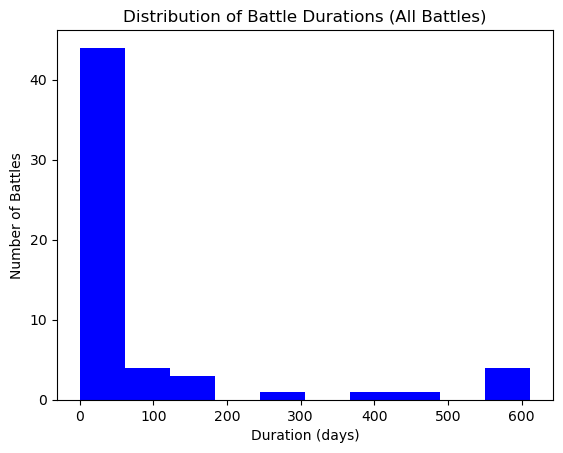

In [26]:
plt.hist(df['Duration'], bins=10, color='blue')
plt.title('Distribution of Battle Durations (All Battles)')
plt.xlabel('Duration (days)')
plt.ylabel('Number of Battles')

plt.show()

In [27]:
# upper quartile
df.nlargest(14, 'Duration')

,Name,Oblast,Start date,End date,Theatre,Result of the battle,Duration
0,Battle of Avdiivka,Donetsk,2022-02-21,2023-10-26,Eastern,Ongoing,612
30,Battle of Huliaipole,Zaporizhzhia,2022-03-05,2023-10-26,Southern,Ongoing,600
31,Battle of Orikhiv,Zaporizhzhia,2022-03-08,2023-10-26,Southern,Ongoing,597
34,Battle of Marinka,Donetsk,2022-03-17,2023-10-26,Eastern,Ongoing,588
48,Battle of Bakhmut,Donetsk,2022-08-01,2023-10-26,Eastern,Ongoing,451
55,Luhansk Oblast campaign,"Kharkiv, Luhansk",2022-10-02,2023-10-26,Eastern,Ongoing,389
56,Battle of Vuhledar,Donetsk,2023-01-24,2023-10-26,Eastern,Ongoing,275
49,Battle of Soledar,Donetsk,2022-08-03,2023-01-16,Eastern,Russian victory,166
37,Sloviansk offensive,Kharkiv,2022-04-11,2022-09-11,Eastern,Ukrainian victory,153
57,2023 Ukrainian counteroffensive,"Zaporizhzhia, Kherson, Donetsk, Luhansk",2023-06-08,2023-10-26,Eastern,Ongoing,140


In [28]:
# lower quartile
df.nsmallest(14, 'Duration')

,Name,Oblast,Start date,End date,Theatre,Result of the battle,Duration
5,Capture of Chernobyl,Kyiv,2022-02-24,2022-02-24,Northern,Russian victory and subsequent withdrawal,0
21,Battle of Vasylkiv,Kyiv,2022-02-26,2022-02-26,Northern,Ukrainian victory,0
3,Snake Island campaign,Odesa,2022-02-24,2022-02-25,Southern,Russian victory and subsequent withdrawal,1
4,Battle of Antonov Airport,Kyiv,2022-02-24,2022-02-25,Northern,Russian victory and subsequent withdrawal,1
8,Battle of Konotop,Sumy,2022-02-24,2022-02-25,Northern,"Russian victory, occupation (February–April 2022)",1
26,Battles of Voznesensk,Mykolaiv,2022-03-02,2022-03-03,Southern,Ukrainian victory,1
38,Battle of Kreminna,Luhansk,2022-04-18,2022-04-19,Eastern,Russian victory,1
14,Battle of Ivankiv,Kyiv,2022-02-25,2022-02-27,Northern,Russian victory and subsequent withdrawal,2
52,Battle of Balakliia,Kharkiv,2022-09-06,2022-09-08,Eastern,Ukrainian victory,2
17,Battle of Melitopol,Zaporizhzhia,2022-02-25,2022-03-01,Southern,Russian victory and ongoing occupation,4


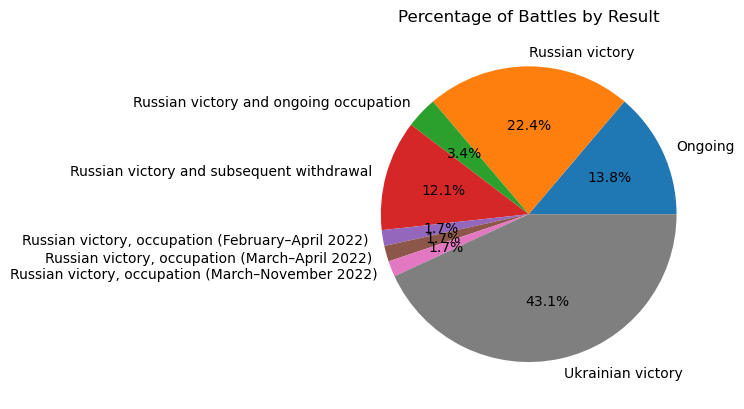

In [33]:
battles_by_result = df.groupby('Result of the battle').size()
all_battles = len(df)
percentage_battles_by_result = ((battles_by_result / all_battles) * 100)
percentage_battles_by_result

fig, ax = plt.subplots()
labels = percentage_battles_by_result.index
values = percentage_battles_by_result
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Battles by Result')

plt.show()

Main Takeaways

In [ ]:
# The majority of battles lasted less than 100 days
# Most of the ongoing battles have been going on for hundreds of days, and thus skew the average length of all battles (outliers)

# If we are measuring success using a binary outcome (victory or defeat), Ukraine and Russia are split almost 50-50
# However, some of the Russian victories were reversed in the long term (subsequent withdrawls, ended occupations)
# If we are measuring success by long-term outcomes, Ukraine is in the lead